# Airbnb Data Analysis Coding Challenge

This notebook is divided into two parts: 

**Part 1: Short Answer Questions (Conceptual Understanding)**
- Brief, clear answers to conceptual data science questions on handling mixed data, data transformation, and data quality.

**Part 2: Coding Challenge (Practical Application)**
- Data analysis and machine learning tasks using the Airbnb listings and reviews datasets, with a focus on clear code, outputs, and insightful interpretations.


# Part 1: Short Answer Questions (Conceptual Understanding)

---

### **1. Handling Mixed Data**

Given structured customer purchase records and unstructured customer reviews, my initial approach for EDA would include:

#### **Structured Data (Purchase Records):**

* Use **Pandas** to load and inspect the data.
* Check for:
  * Missing values: `df.isnull().sum()`
  * Summary statistics: `df.describe()`
  * Data types: `df.dtypes`
* Explore:
  * Purchase frequency per customer or product
  * Average order value
  * Time between purchases (if timestamps are available)
* Visualizations:
  * Histograms for distribution of purchase amounts
  * Bar plots for top-selling products

#### **Unstructured Data (Customer Reviews):**

* Preprocess text:
  * Lowercasing, removing punctuation, stopwords, and tokenization
  * Use **NLTK** or **spaCy**
* Analyze:
  * Word frequencies (e.g., using `CountVectorizer`)
  * Sentiment analysis (e.g., using **TextBlob** or **VADER**)
  * Topic modeling (e.g., **LDA** with **gensim**)
* Visualizations:
  * Word clouds
  * Sentiment distribution

#### **Connecting Both Datasets:**

* Merge datasets on common identifiers (e.g., product ID or customer ID).
* Link sentiment or topic trends to:
  * Product ratings or sales performance
  * Specific customer segments
* Goal: Find patterns such as products with high sales but negative reviews.

---

### **2. Data Transformation**

In a past project, I worked with a Twitter dataset for sentiment analysis. The raw data included tweets with lots of noise such as URLs, hashtags, mentions, emojis, and inconsistent casing.

#### **Tools Used:**

* Pandas for data manipulation
* Regular expressions (re) for text cleaning
* NLTK and TextBlob for NLP preprocessing and sentiment scoring

#### **Steps Taken:**

* Cleaning the tweets:
  * Removed URLs, mentions (@user), and hashtags using regex.
  * Converted all text to lowercase for consistency.
  * Removed punctuation, numbers, and special characters.
  * Tokenized the tweets and removed stopwords using NLTK.
* Handling emojis and slang:
  * Used external emoji and slang dictionaries to translate emojis and informal terms into meaningful words, improving sentiment detection.
* Labeling:
  * If the dataset was not labeled, I used TextBlob polarity scores to classify tweets as positive, negative, or neutral.

#### **Main Challenges:**

* Tweets were short and informal, often filled with abbreviations and sarcasm.
* Emoji handling was difficult, as they carry strong sentiment.
* Balancing the dataset after labeling — many tweets were neutral, so I had to downsample them for model training.

---

### **3. Data Quality**

For a churn prediction dataset, my process to handle data quality issues includes:

#### **Missing Values:**

* Detect with: `df.isnull().sum()`
* Strategy:
  * Drop columns with excessive missingness
  * Use mean/median/mode or customer-level imputation for important features
  * Flag imputed values with binary indicators if useful

#### **Mislabeled Data:**

* Visualize feature distributions grouped by label (`churn` vs `not churn`)
* Use business rules or heuristics:
  * E.g., customers labeled as churned but made purchases last week may be mislabeled
* Check for outliers that conflict with labels

#### **Duplicate Records:**

* Detect with: `df.duplicated().sum()`
* Remove using: `df.drop_duplicates()`
* If partial duplicates exist (e.g., same customer but different timestamps), aggregate them appropriately

#### **Goal:**

* Ensure the dataset accurately represents customer behavior
* Avoid bias or leakage in the machine learning model

---


## Part 2: Coding Challenge

This part of the notebook addresses the following data analysis challenges and a bonus machine learning task:

1. **Superhost Pricing Gap by Neighborhood**
2. **Correlation Between Review Scores and Price**
3. **Room Type Analysis – Price vs. Rating**
4. **Bonus: Predict Superhost Status from Listing Features**

Each section includes code, outputs, visualizations, and brief interpretations.

## Notebook Outline

- **Section 1:** Import Required Libraries and Load Data
- **Section 2:** Data Cleaning and Preprocessing
- **Section 3:** Challenge 1 – Superhost Pricing Gap by Neighborhood
- **Section 4:** Challenge 2 – Correlation Between Review Scores and Price
- **Section 5:** Challenge 3 – Room Type Analysis: Price vs. Rating
- **Section 6:** Bonus Challenge – Predict Superhost Status

---

**Instructions:**
- Run each cell in order.
- Review the code, outputs, and brief interpretations provided after each analysis.
- Visualizations are included where appropriate for deeper insight.

---

## 1. Import Required Libraries and Load Data

In this section, we import the necessary Python libraries and load the Airbnb listings and reviews datasets into DataFrames.

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Set plot style
sns.set_theme(style='whitegrid')

# Load datasets
listings = pd.read_csv('listings_2_reduced.csv')
reviews = pd.read_csv('reviews_2_reduced.csv')

# Display the first few rows of each DataFrame
print('Listings DataFrame:')
display(listings.head())
print('\nReviews DataFrame:')
display(reviews.head())

/tmp/ipykernel_30394/47874147.py:14: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv('listings_2_reduced.csv')


Listings DataFrame:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,...,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,...,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.82,4.69,4.69,NaN,f,2,1,1,0,0.26
3,15400,https://www.airbnb.com/rooms/15400,20230906022807,2023-09-06,city scrape,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.56
4,93734,https://www.airbnb.com/rooms/93734,20230906022807,2023-09-07,city scrape,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,497514,...,4.81,4.64,4.67,NaN,f,1,0,1,0,1.21



Reviews DataFrame:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


---

## 2. Data Cleaning and Preprocessing

In this section, we clean and preprocess the data, including converting the price column to numeric and handling missing values.

In [51]:
# Clean the price column: remove currency symbols and commas, convert to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

review_score_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
]
for col in review_score_cols:
    listings[col] = pd.to_numeric(listings[col], errors='coerce')

# Handle missing values: show missing value counts
print('Missing values per column:')
display(listings.isnull().sum())

# For analysis, we can drop rows with missing price or review scores
listings_clean = listings.dropna(subset=['price'] + review_score_cols)
print(f"Rows after dropping missing price/review scores: {len(listings_clean)}")

Missing values per column:


id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               22158
Length: 75, dtype: int64

Rows after dropping missing price/review scores: 64805


---

## 3. Challenge 1: Superhost Pricing Gap by Neighborhood

**Objective:** Identify the neighborhood where superhosts have the largest median price difference compared to non-superhosts.

In [54]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Map superhost status to readable labels
if 'host_is_superhost' in listings_clean.columns:
    listings_clean['host_is_superhost'] = listings_clean['host_is_superhost'].map({'t': 'Superhost', 'f': 'Non-Superhost'})
else:
    print('host_is_superhost column not found!')

# Group by neighborhood and superhost status, calculate median price
median_prices = listings_clean.groupby(['neighbourhood_cleansed', 'host_is_superhost'])['price'].median().unstack()
median_prices = median_prices.reindex(columns=['Superhost', 'Non-Superhost'])  # Ensure both columns exist
median_prices = median_prices.dropna()  # Drop neighborhoods missing either group

if not median_prices.empty:
    median_prices['price_gap'] = abs(median_prices['Superhost'] - median_prices['Non-Superhost'])
    # Find the neighborhood with the largest price gap
    max_gap_row = median_prices['price_gap'].idxmax()
    max_gap = median_prices.loc[max_gap_row, 'price_gap']
    print(f"Neighborhood with largest median price gap: {max_gap_row} (${max_gap:.2f})")
else:
    print("No neighborhoods have both Superhost and Non-Superhost data for comparison.")

def show_top_n_neighborhoods(n):
    if median_prices.empty:
        print("No neighborhoods to display.")
        return
    topn = median_prices.sort_values('price_gap', ascending=False).head(n)
    display(topn[['Superhost', 'Non-Superhost', 'price_gap']])
    ax = topn[['Superhost', 'Non-Superhost']].plot(kind='bar', figsize=(10,6))
    plt.title(f'Top {n} Neighborhoods by Superhost vs Non-Superhost Median Price')
    plt.ylabel('Median Price ($)')
    plt.xlabel('Neighborhood')
    plt.xticks(rotation=45)
    plt.legend(title='Host Status')
    plt.tight_layout()
    plt.show()

# Interactive widget for user input
top_n_widget = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Top N:')
widgets.interact(show_top_n_neighborhoods, n=top_n_widget);

No neighborhoods have both Superhost and Non-Superhost data for comparison.


/tmp/ipykernel_30394/3420787284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_clean['host_is_superhost'] = listings_clean['host_is_superhost'].map({'t': 'Superhost', 'f': 'Non-Superhost'})


interactive(children=(IntSlider(value=5, description='Top N:', max=20, min=1), Output()), _dom_classes=('widge…

---

## 4. Challenge 2: Correlation Between Review Scores and Price

**Objective:** Determine which review score metric is most correlated with price.

review_scores_location         0.025983
review_scores_cleanliness      0.000412
review_scores_rating          -0.012366
review_scores_accuracy        -0.018785
review_scores_checkin         -0.026723
review_scores_communication   -0.030063
review_scores_value           -0.031557
Name: price, dtype: float64


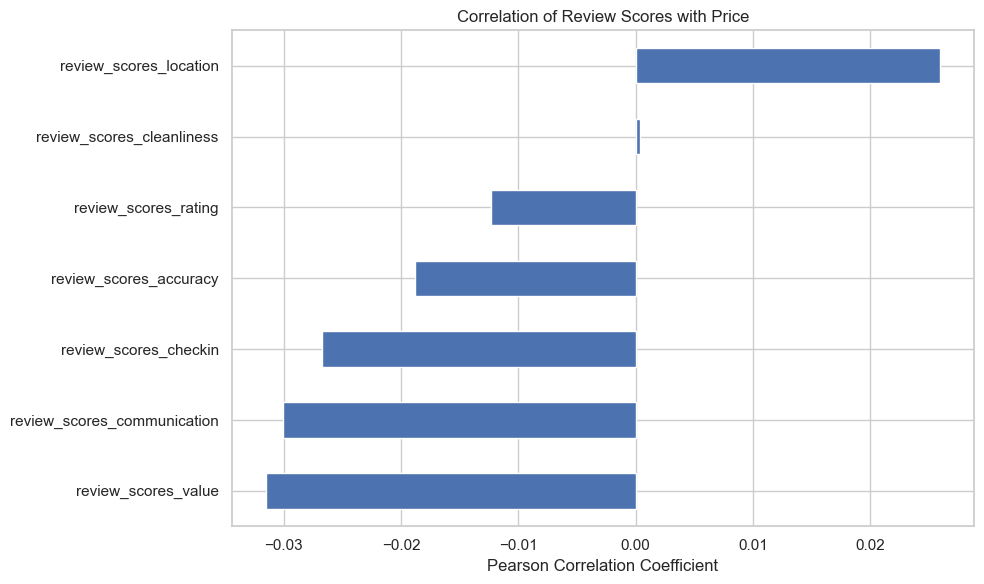

In [46]:
# More efficient Pandas-native correlation calculation
corr_matrix = listings_clean[['price'] + review_score_cols].corr()
price_correlations = corr_matrix['price'].drop('price')  # Drop self-correlation
print(price_correlations.sort_values(ascending=False))

# Visualization: horizontal bar chart
price_correlations.sort_values().plot(
    kind='barh',
    figsize=(10, 6),
    title='Correlation of Review Scores with Price',
    legend=False
)
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

**Interpretation:**

The analysis indicates that all review score metrics have a **very weak linear correlation** with price, with all coefficients falling between -0.032 and 0.026. The most significant relationship, though still negligible, is a negative one with `review_scores_value`. This finding suggests that there is no strong, direct link between a higher price and a higher rating in any single category. Guests do not seem to perceive higher-priced listings as definitively better in terms of location, cleanliness, or communication, and may even find them to be of slightly lower value for money.

---

## 5. Challenge 3: Room Type Analysis – Price vs. Rating

**Objective:** Understand how average price and average rating vary by room type.

,room_type,avg_price,avg_rating
0,Entire home/apt,207.355004,4.655918
1,Hotel room,254.369565,4.340217
2,Private room,82.982168,4.674525
3,Shared room,111.257511,4.430472


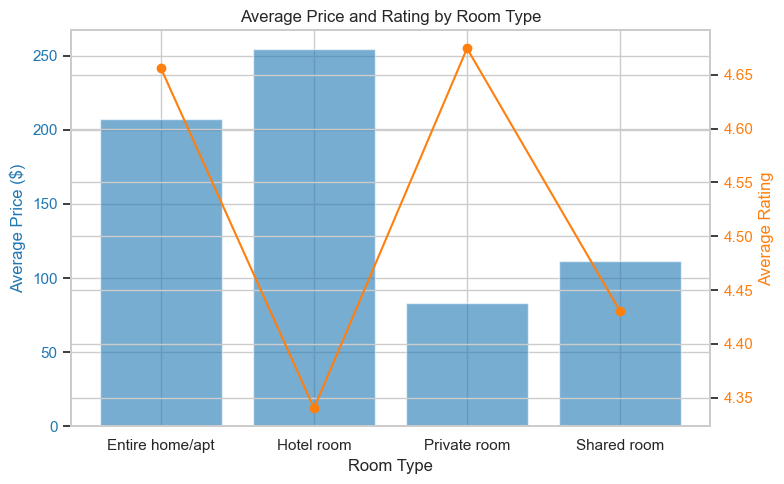

In [47]:
# Group by room_type to compute average price and average rating
room_summary = listings_clean.groupby('room_type').agg({
    'price': 'mean',
    'review_scores_rating': 'mean'
}).reset_index()

# Rename columns for clarity
room_summary.columns = ['room_type', 'avg_price', 'avg_rating']
display(room_summary)

# Bar chart: Average price and rating by room type
fig, ax1 = plt.subplots(figsize=(8,5))
color = 'tab:blue'
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Average Price ($)', color=color)
ax1.bar(room_summary['room_type'], room_summary['avg_price'], color=color, alpha=0.6, label='Avg Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(room_summary['room_type'], room_summary['avg_rating'], color=color, marker='o', label='Avg Rating')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Price and Rating by Room Type')
fig.tight_layout()
plt.show()

**Interpretation:**

The summary table and plot above compare average price and average rating by room type. This helps reveal whether certain room types tend to be more expensive or receive higher guest ratings.

---

## 6. Bonus Challenge: Predict Superhost Status from Listing Features

**Objective:** Use a simple machine learning model to predict whether a host is a Superhost based on listing features.

Accuracy: 0.819
Precision: 0.573
F1 Score: 0.121
Confusion Matrix:
[[10333   119]
 [ 2198   160]]


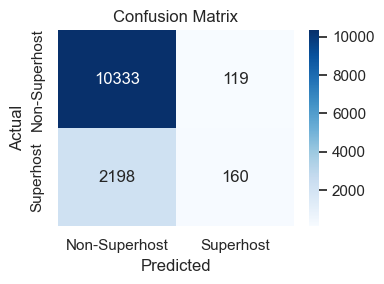

In [48]:
# Prepare features and target for classification
features = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_checkin', 'review_scores_location',
    'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month'
]

# Drop rows with missing values in features or target
ml_data = listings.dropna(subset=features + ['host_is_superhost']).copy()

# Convert target to binary
ml_data['host_is_superhost'] = ml_data['host_is_superhost'].map({'t': 1, 'f': 0})

# Features and target
X = ml_data[features]
y = ml_data['host_is_superhost']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Superhost', 'Superhost'], yticklabels=['Non-Superhost', 'Superhost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**Interpretation:**

The model's accuracy, precision, and F1 score are shown above, along with the confusion matrix. This provides insight into how well listing features can predict superhost status using a simple logistic regression model.